In [16]:
import m2aia as m2

In [22]:
# pyM2aia's imzML parser steps (by default):
# 1) Parse the ImzML
# 2) Initialize mask and index images (see cell at the end of the notebook)
# 3) Calculate mean and skyline spectrum over all spectra (inclusive signal processing)
def load(path):
    I = m2.ImzMLReader(path)
    # Define potential signal processing methods before execution. e.g.:
    # I.SetBaselineCorrection(m2.m2BaselineCorrectionTopHat)
    # I.SetSmoothing(m2.m2SmoothingSavitzkyGolay)
    # I.SetNormalization(m2.m2NormalizationTIC)
    # I.SetIntensityTransformation(m2.m2IntensityTransformationLog10)
    return I.Execute()


In [19]:
# Faild due to invalid imzML file!.# %timeit -n10 -r10 load("Brain01_Bregma-1-46_centroid (1).imzML")

521 ms ± 4.48 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [19]:
%timeit -n10 -r10 load("brain 25µm raw - root mean square - metaspace.imzML")

521 ms ± 4.48 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [20]:
%timeit -n10 -r10 load("Mousebrain_MG08_2017_GruppeF.imzML")

359 ms ± 4.21 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


[871.241] [imzML]: brain 25µm raw - root mean square - metaspace.imzML
	[pixel size]: 25.000000x25.000000
	[image area]: 213x436
	[image dims]: 5325.000000x10900.000000


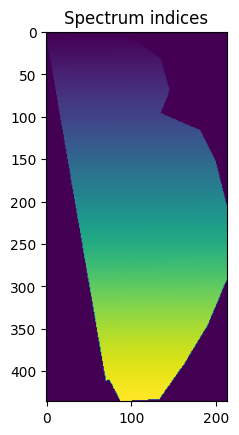

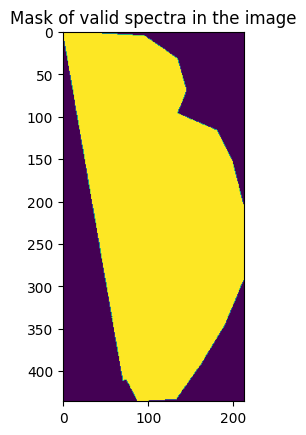

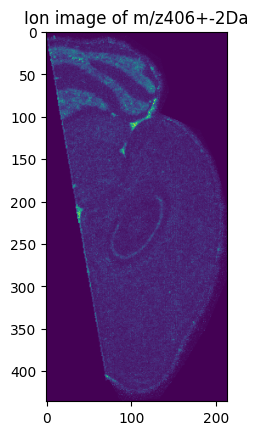

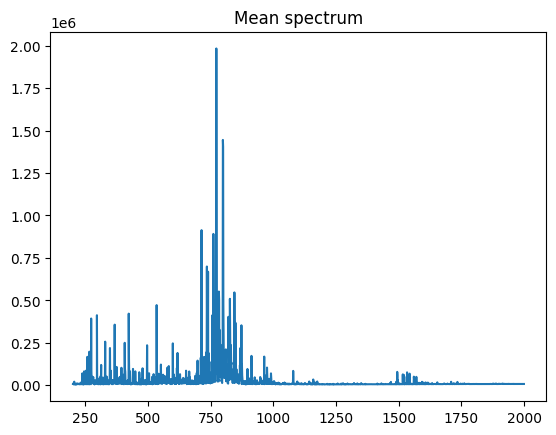

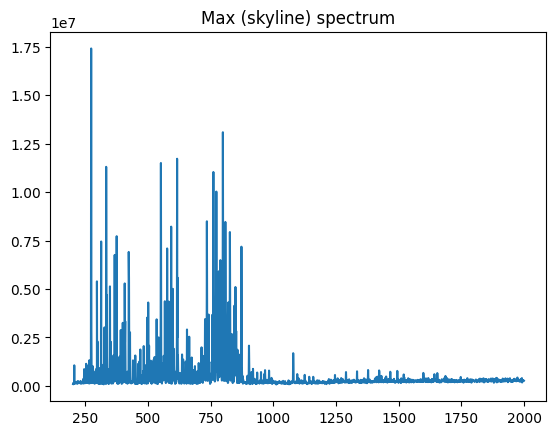

In [30]:
import matplotlib.pyplot as plt
I = load("brain 25µm raw - root mean square - metaspace.imzML")

plt.figure()
plt.imshow(I.GetIndexArray()[0])
plt.title("Spectrum indices")

plt.figure()
plt.imshow(I.GetMaskArray()[0])
plt.title("Mask of valid spectra in the image")

plt.figure()
plt.title("Ion image of m/z406+-2Da")
plt.imshow(I.GetArray(406,2)[0])

plt.figure()
plt.title("Mean spectrum")
plt.plot(I.GetXAxis(), I.GetMeanSpectrum())

plt.figure()
plt.title("Max (skyline) spectrum")
plt.plot(I.GetXAxis(), I.GetMaxSpectrum())